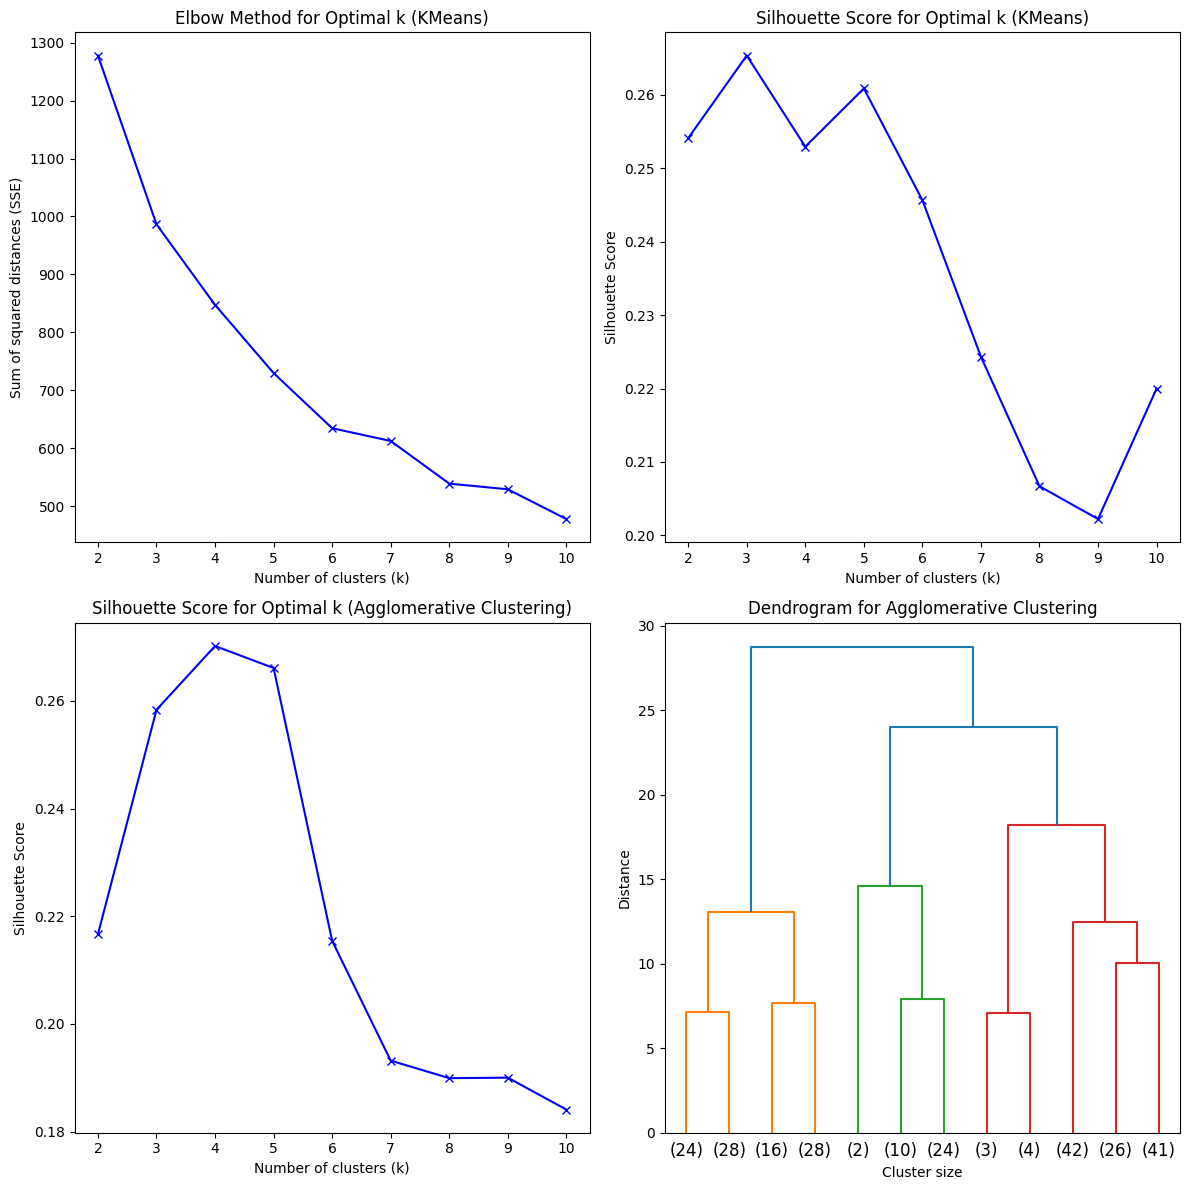

In [127]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Charger et prétraiter les données
data = pd.read_csv('/home/codespace/project_data/dataVisualization/result.csv')
data.dropna(inplace=True)
X = data[['Median_R', 'Median_G', 'Median_B', 'Std_R', 'Std_G', 'Std_B', 'Area']]
y = data['bug type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Méthode du coude et Silhouette Score pour KMeans
sse_kmeans = []
silhouette_scores_kmeans = []
k_values = range(2, 11)  # Nous testons k de 2 à 10

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    sse_kmeans.append(kmeans.inertia_)
    
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores_kmeans.append(silhouette_avg)

# Méthode du coude et Silhouette Score pour Agglomerative Clustering
silhouette_scores_agg = []

for k in k_values:
    agg_clustering = AgglomerativeClustering(n_clusters=k)
    labels = agg_clustering.fit_predict(X_scaled)
    
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores_agg.append(silhouette_avg)

# Visualisation des résultats

plt.figure(figsize=(12, 12))

# Plot Elbow Method for KMeans
plt.subplot(2, 2, 1)
plt.plot(k_values, sse_kmeans, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSE)')
plt.title('Elbow Method for Optimal k (KMeans)')

# Plot Silhouette Scores for KMeans
plt.subplot(2, 2, 2)
plt.plot(k_values, silhouette_scores_kmeans, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k (KMeans)')

# Plot Silhouette Scores for Agglomerative Clustering
plt.subplot(2, 2, 3)
plt.plot(k_values, silhouette_scores_agg, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k (Agglomerative Clustering)')

# Dendrogram for Agglomerative Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X_scaled, method='ward')
plt.subplot(2, 2, 4)
dendrogram(linked, truncate_mode='lastp', p=12)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Cluster size')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()
